In [1]:
# Import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create sets of random latitude and logitude combinations
lats = np.random.uniform(-90, 90, size=1500)
lngs = np.random.uniform(-180, 180, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list
coordinates = list(lat_lngs)

In [4]:
from citipy import citipy

In [5]:
# Create list for holding cities
cities = []
# Identify nearest city for each lat and long 
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If city is unique - add to city list
    if city not in cities:
        cities.append(city)
        
len(cities)

621

In [6]:
# Import dependencies
import requests
from config import weather_api_key
from datetime import datetime

In [7]:
# Starting URL for weather API call
url = "http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=" + weather_api_key

In [8]:
# Create empty list to hold weather data
city_data = []

# Print the beginning of the logging
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in list
for i, city in enumerate(cities):
    
    # Group cities in sets of 50 for loggin purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    city_url = url + "&q=" + city.replace(" ", "+")
    
    # Log URL, record , and set numbers and the city
    print(f'Processing Record {record_count} of Set {set_count} | {city}')
    # Add 1 to the record count
    record_count += 1
    # Run an API request for each city
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        # Parse out needed data
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        # Convert the date to ISO standard
        city_date = datetime.utcfromtimestamp(city_weather['dt']).strftime('%Y-%m-%d %H:%M:%S')
        # Append city info to city_data list
        city_data.append({'City': city.title(),
                          'Lat': city_lat,
                          'Lng': city_lng,
                          'Max Temp': city_max_temp,
                          'Humidity': city_humidity,
                          'Cloudiness': city_clouds,
                          'Wind Speed': city_wind,
                          'Country': city_country,
                          'Date': city_date}) 
    # if error skip city
    except:
        print('City not found. Skipping...')
        pass
    
# Indicate the data loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | san angelo
Processing Record 2 of Set 1 | hofn
Processing Record 3 of Set 1 | kota belud
Processing Record 4 of Set 1 | aykhal
Processing Record 5 of Set 1 | matagami
Processing Record 6 of Set 1 | tuatapere
Processing Record 7 of Set 1 | tvedestrand
Processing Record 8 of Set 1 | la cruz
Processing Record 9 of Set 1 | sanchor
Processing Record 10 of Set 1 | poum
Processing Record 11 of Set 1 | rikitea
Processing Record 12 of Set 1 | hobart
Processing Record 13 of Set 1 | hilo
Processing Record 14 of Set 1 | punta arenas
Processing Record 15 of Set 1 | yellowknife
Processing Record 16 of Set 1 | prince rupert
Processing Record 17 of Set 1 | cidreira
Processing Record 18 of Set 1 | merauke
Processing Record 19 of Set 1 | jalu
Processing Record 20 of Set 1 | bethel
Processing Record 21 of Set 1 | thompson
Processing Record 22 of Set 1 | hundorp
Processing Record 23 of Set 1 | busselton
Processing R

Processing Record 36 of Set 4 | new norfolk
Processing Record 37 of Set 4 | lashio
Processing Record 38 of Set 4 | sunland park
Processing Record 39 of Set 4 | lukovetskiy
Processing Record 40 of Set 4 | uyuni
Processing Record 41 of Set 4 | praia da vitoria
Processing Record 42 of Set 4 | yanan
City not found. Skipping...
Processing Record 43 of Set 4 | la ronge
Processing Record 44 of Set 4 | ishim
Processing Record 45 of Set 4 | qui nhon
Processing Record 46 of Set 4 | krynychky
Processing Record 47 of Set 4 | kewanee
Processing Record 48 of Set 4 | sinop
Processing Record 49 of Set 4 | nuuk
Processing Record 50 of Set 4 | viedma
Processing Record 1 of Set 5 | sitka
Processing Record 2 of Set 5 | trinidad
Processing Record 3 of Set 5 | mehamn
Processing Record 4 of Set 5 | canakkale
Processing Record 5 of Set 5 | kisangani
Processing Record 6 of Set 5 | bolonchen
City not found. Skipping...
Processing Record 7 of Set 5 | coihaique
Processing Record 8 of Set 5 | gisborne
Processing R

Processing Record 28 of Set 8 | nieves
Processing Record 29 of Set 8 | novoagansk
Processing Record 30 of Set 8 | ocos
Processing Record 31 of Set 8 | ahuas
Processing Record 32 of Set 8 | santa rosa
Processing Record 33 of Set 8 | usogorsk
Processing Record 34 of Set 8 | ayorou
Processing Record 35 of Set 8 | neiafu
Processing Record 36 of Set 8 | north bend
Processing Record 37 of Set 8 | kempsey
Processing Record 38 of Set 8 | mao
Processing Record 39 of Set 8 | oriximina
Processing Record 40 of Set 8 | huilong
Processing Record 41 of Set 8 | mendahara
City not found. Skipping...
Processing Record 42 of Set 8 | ulaanbaatar
Processing Record 43 of Set 8 | bac lieu
Processing Record 44 of Set 8 | yatou
Processing Record 45 of Set 8 | ancud
Processing Record 46 of Set 8 | santa marinella
Processing Record 47 of Set 8 | virginia beach
Processing Record 48 of Set 8 | wanning
Processing Record 49 of Set 8 | cadillac
Processing Record 50 of Set 8 | diamantino
Processing Record 1 of Set 9 |

City not found. Skipping...
Processing Record 12 of Set 12 | eydhafushi
Processing Record 13 of Set 12 | kangayam
Processing Record 14 of Set 12 | samarai
Processing Record 15 of Set 12 | sabzevar
Processing Record 16 of Set 12 | champerico
Processing Record 17 of Set 12 | griffith
Processing Record 18 of Set 12 | kilemary
Processing Record 19 of Set 12 | tamiahua
Processing Record 20 of Set 12 | pahrump
Processing Record 21 of Set 12 | kumluca
Processing Record 22 of Set 12 | touros
Processing Record 23 of Set 12 | san pablo tacachico
Processing Record 24 of Set 12 | ostersund
Processing Record 25 of Set 12 | kloulklubed
Processing Record 26 of Set 12 | maralal
Processing Record 27 of Set 12 | tambo
Processing Record 28 of Set 12 | port hawkesbury
Processing Record 29 of Set 12 | grand river south east
City not found. Skipping...
Processing Record 30 of Set 12 | vilyuysk
Processing Record 31 of Set 12 | bolungarvik
City not found. Skipping...
Processing Record 32 of Set 12 | bahia hon

In [9]:
# Convert array of dictionaries to DataFrame
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,San Angelo,31.4638,-100.4370,61.00,77,90,3.44,US,2021-04-04 15:22:23
1,Hofn,64.2539,-15.2082,18.88,54,58,25.10,IS,2021-04-04 15:23:55
2,Kota Belud,6.3510,116.4305,84.20,84,20,2.30,MY,2021-04-04 15:23:55
3,Aykhal,66.0000,111.5000,-18.27,100,99,5.84,RU,2021-04-04 15:23:55
4,Matagami,49.7502,-77.6328,33.80,100,90,9.22,CA,2021-04-04 15:23:56
5,Tuatapere,-46.1333,167.6833,57.99,69,35,4.00,NZ,2021-04-04 15:23:56
6,Tvedestrand,58.6220,8.9315,44.60,81,75,14.97,NO,2021-04-04 15:23:56
7,La Cruz,23.9167,-106.9000,75.60,48,0,3.24,MX,2021-04-04 15:23:57
8,Sanchor,24.7553,71.7722,88.20,17,0,10.11,IN,2021-04-04 15:23:57
9,Poum,-20.2333,164.0167,79.18,79,100,24.34,NC,2021-04-04 15:21:18


In [10]:
# Reorder columns
city_data_df = city_data_df[['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,San Angelo,US,2021-04-04 15:22:23,31.4638,-100.4370,61.00,77,90,3.44
1,Hofn,IS,2021-04-04 15:23:55,64.2539,-15.2082,18.88,54,58,25.10
2,Kota Belud,MY,2021-04-04 15:23:55,6.3510,116.4305,84.20,84,20,2.30
3,Aykhal,RU,2021-04-04 15:23:55,66.0000,111.5000,-18.27,100,99,5.84
4,Matagami,CA,2021-04-04 15:23:56,49.7502,-77.6328,33.80,100,90,9.22
5,Tuatapere,NZ,2021-04-04 15:23:56,-46.1333,167.6833,57.99,69,35,4.00
6,Tvedestrand,NO,2021-04-04 15:23:56,58.6220,8.9315,44.60,81,75,14.97
7,La Cruz,MX,2021-04-04 15:23:57,23.9167,-106.9000,75.60,48,0,3.24
8,Sanchor,IN,2021-04-04 15:23:57,24.7553,71.7722,88.20,17,0,10.11
9,Poum,NC,2021-04-04 15:21:18,-20.2333,164.0167,79.18,79,100,24.34


In [11]:
# Create output file (csv)
output_data_file = 'Resources/cities.csv'
# Export City_Data to csv
city_data_df.to_csv(output_data_file, index_label='City_ID')

In [12]:
# Extract relevant fields from DF
lats = city_data_df.Lat
max_temps = city_data_df['Max Temp']
humidity = city_data_df.Humidity
cloudiness = city_data_df.Cloudiness
wind_speed = city_data_df['Wind Speed']

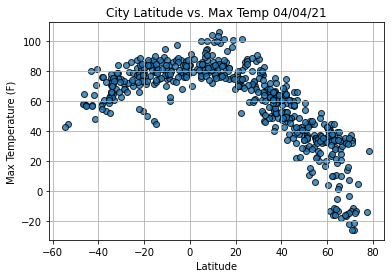

In [14]:
# Import time module
import time

# Build scatterplot for lat vs max temp
plt.scatter(lats,
            max_temps,
            edgecolors='black',
            linewidths=1,
            marker='o',
            alpha=0.8,
            label='Cities')

# other graph properties
plt.title(f'City Latitude vs. Max Temp ' + time.strftime('%x'))
plt.ylabel('Max Temperature (F)')
plt.xlabel('Latitude')
plt.grid(True)

# Save figure
plt.savefig('Resources/Fig1.png')

# Show plot
plt.show()

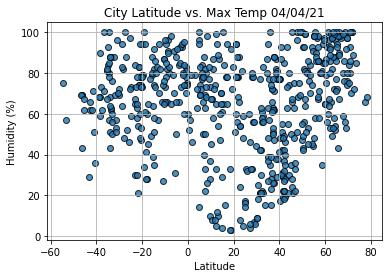

In [15]:
# Build scatterplot for lat vs humidity
plt.scatter(lats,
            humidity,
            edgecolors='black',
            linewidths=1,
            marker='o',
            alpha=0.8,
            label='Cities')

# other graph properties
plt.title(f'City Latitude vs. Max Temp ' + time.strftime('%x'))
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')
plt.grid(True)

# Save figure
plt.savefig('Resources/Fig2.png')

# Show plot
plt.show()

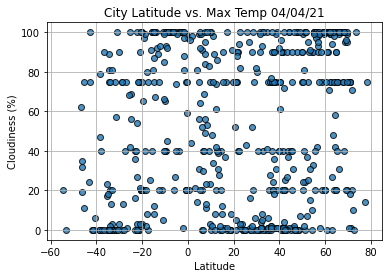

In [16]:
# Build scatterplot for lat vs cloudiness
plt.scatter(lats,
            cloudiness,
            edgecolors='black',
            linewidths=1,
            marker='o',
            alpha=0.8,
            label='Cities')

# other graph properties
plt.title(f'City Latitude vs. Max Temp ' + time.strftime('%x'))
plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')
plt.grid(True)

# Save figure
plt.savefig('Resources/Fig3.png')

# Show plot
plt.show()

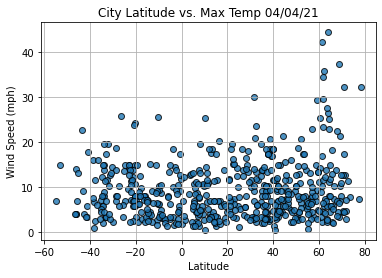

In [17]:
# Build scatterplot for lat vs wind speed
plt.scatter(lats,
            wind_speed,
            edgecolors='black',
            linewidths=1,
            marker='o',
            alpha=0.8,
            label='Cities')

# other graph properties
plt.title(f'City Latitude vs. Max Temp ' + time.strftime('%x'))
plt.ylabel('Wind Speed (mph)')
plt.xlabel('Latitude')
plt.grid(True)

# Save figure
plt.savefig('Resources/Fig4.png')

# Show plot
plt.show()

In [18]:
from scipy.stats import linregress

In [32]:
# Create function to create perform linear regression on weather data and plot
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    # Run regression on weather data
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate regression line 'y values' from slope and intercept
    regress_values = x_values * slope + intercept
    
    # Get equation of line
    line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))
    
    # Create scatter plot and regression line
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, 'r')
    # Annotage line equeation
    plt.annotate(line_eq, text_coordinates, fontsize=15, color='red')
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [33]:
# Create DataFrame for northern and southern hemisheres
northern_hemi_df = city_data_df.loc[(city_data_df['Lat'] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df['Lat'] < 0)]

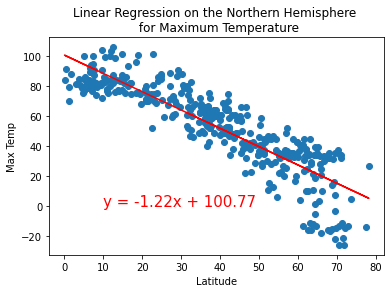

In [44]:
# Linear regression on northern hemi
x_values = northern_hemi_df.Lat
y_values = northern_hemi_df['Max Temp']
# Call function
plot_linear_regression(x_values, y_values, 
                       'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 'Max Temp', (10,0))


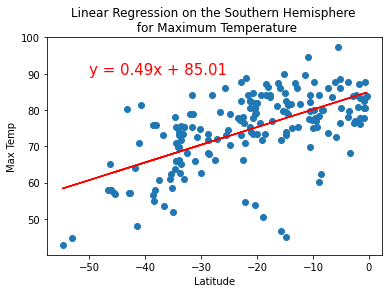

In [45]:
# Linear regression on southern hemi
x_values = southern_hemi_df.Lat
y_values = southern_hemi_df['Max Temp']
# Call function
plot_linear_regression(x_values, y_values, 
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp', (-50, 90))

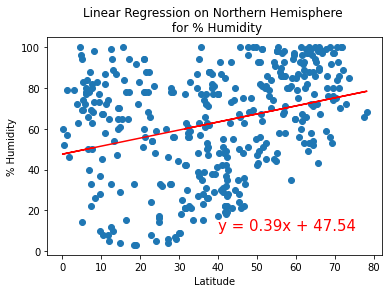

In [46]:
# Linear regression on Norther Hemisphere
x_values = northern_hemi_df.Lat
y_values = northern_hemi_df.Humidity
# Call Function
plot_linear_regression(x_values, y_values,
                      'Linear Regression on Northern Hemisphere \n for % Humidity', '% Humidity', (40,10))

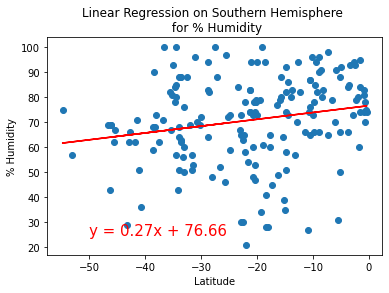

In [49]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df.Lat
y_values = southern_hemi_df.Humidity
# Call function
plot_linear_regression(x_values, y_values,
                      'Linear Regression on Southern Hemisphere \n for % Humidity', '% Humidity', (-50,25))

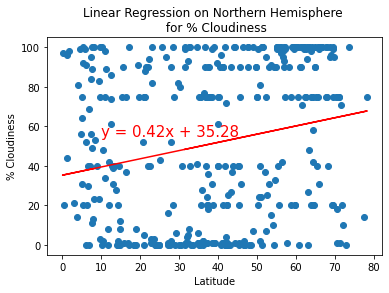

In [50]:
# Linear regression for northern hemi
x_values = northern_hemi_df.Lat
y_values = northern_hemi_df.Cloudiness
# Call function
plot_linear_regression(x_values, y_values,
                      'Linear Regression on Northern Hemisphere \n for % Cloudiness', '% Cloudiness', (10, 55))

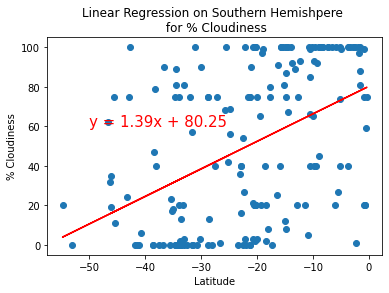

In [51]:
# Linear regression on Southern hemi
x_values = southern_hemi_df.Lat
y_values = southern_hemi_df.Cloudiness
# Call function
plot_linear_regression(x_values, y_values,
                      'Linear Regression on Southern Hemishpere \n for % Cloudiness', '% Cloudiness',(-50,60))

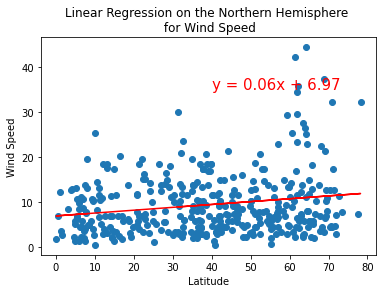

In [52]:
# Linear regression on northern hemi
x_values = northern_hemi_df.Lat
y_values = northern_hemi_df['Wind Speed']
# Call function
plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed', (40,35))

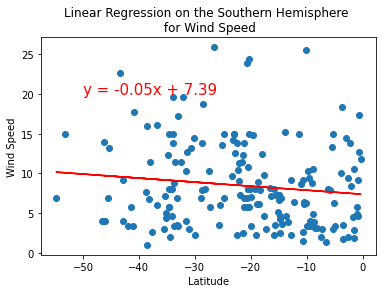

In [55]:
# Linear regression on Southern hemi
x_values = southern_hemi_df.Lat
y_values = southern_hemi_df['Wind Speed']
# Call function
plot_linear_regression(x_values, y_values, 
                      'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed', (-50,20))